In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

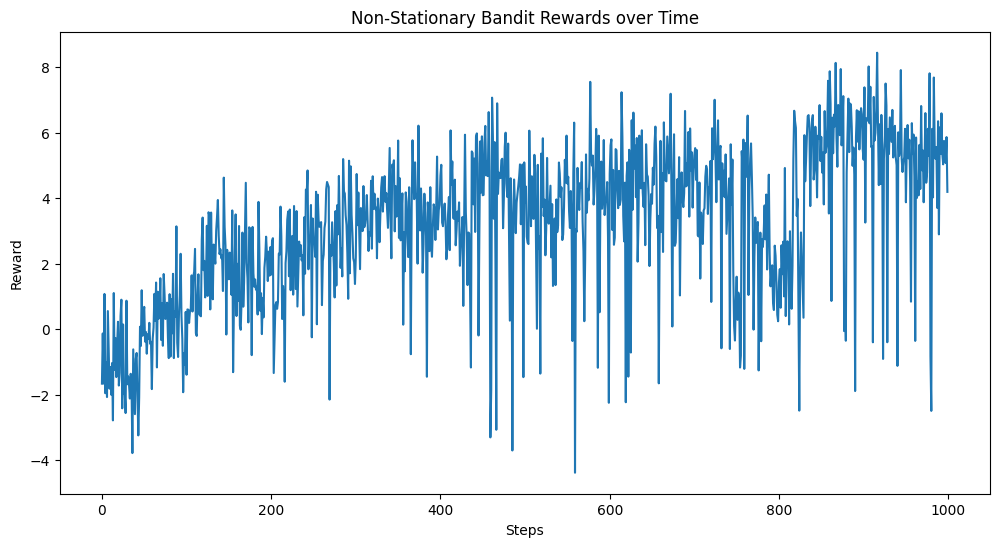

In [ ]:
class NonStationaryBandit:
    def __init__(self, n_arms, n_steps, window_size=100):
        self.n_arms = n_arms
        self.n_steps = n_steps
        self.true_values = np.zeros(n_arms)
        self.reward_history = []
        self.window_size = window_size
        self.rewards = np.zeros(n_arms)   # To store rewards
        self.counts = np.zeros(n_arms)    # To count the number of times each arm is chosen
        self.arm_history = []             # To store selected arm history

    def reset(self):
        self.true_values = np.random.normal(0, 1, self.n_arms)
        self.rewards = np.zeros(self.n_arms)
        self.counts = np.zeros(self.n_arms)
        self.arm_history = []
        self.reward_history = []

    def step(self, arm):
        # Reward is drawn from a normal distribution, with mean true_values[arm]
        reward = np.random.normal(self.true_values[arm], 1)
        self.true_values += np.random.normal(0, 0.1, self.n_arms)  # Non-stationarity
        return reward

    def select_arm(self, epsilon=0.1):
        if np.random.random() < epsilon:
            # Exploration
            return np.random.randint(self.n_arms)
        else:
            # Exploitation
            return np.argmax(self.rewards / (self.counts + 1e-5))  # Add small value to avoid division by zero

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.reward_history.append(reward)
        self.arm_history.append(arm)
        # Track reward with sliding window
        if len(self.reward_history) > self.window_size:
            sliding_rewards = self.reward_history[-self.window_size:]
            sliding_arms = self.arm_history[-self.window_size:]
            for a in range(self.n_arms):
                arm_rewards = [sliding_rewards[i] for i in range(len(sliding_arms)) if sliding_arms[i] == a]
                if arm_rewards:
                    self.rewards[a] = np.mean(arm_rewards)

    def run(self, epsilon=0.1):
        for step in range(self.n_steps):
            arm = self.select_arm(epsilon)
            reward = self.step(arm)
            self.update(arm, reward)

def simulate_bandit(n_arms, n_steps, window_size=100, epsilon=0.1):
    bandit = NonStationaryBandit(n_arms, n_steps, window_size)
    bandit.reset()
    bandit.run(epsilon)

    plt.figure(figsize=(12, 6))
    plt.plot(bandit.reward_history)
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title('Non-Stationary Bandit Rewards over Time')
    plt.show()

# Simulate the non-stationary bandit problem
simulate_bandit(n_arms=5, n_steps=1000, window_size=100, epsilon=0.1)


# EXPLANATION

Sure! Let's go through the code step by step, explaining each part in detail.

### 1. Class `NonStationaryBandit`
This class models the multi-armed bandit problem where the true values of the arms (rewards) change over time, making the problem non-stationary.

```python
class NonStationaryBandit:
```

This defines the `NonStationaryBandit` class that contains methods and variables to manage the behavior of the bandit problem.

---

### 2. `__init__(self, n_arms, n_steps, window_size=100)`
The `__init__` function is the constructor, initializing the bandit with the following parameters:

- `n_arms`: The number of arms (choices) the bandit has.
- `n_steps`: The number of time steps the simulation will run for.
- `window_size`: This is used to maintain a sliding window of recent rewards for each arm, defaulting to 100.

```python
    def __init__(self, n_arms, n_steps, window_size=100):
        self.n_arms = n_arms
        self.n_steps = n_steps
        self.true_values = np.zeros(n_arms)
        self.reward_history = []
        self.window_size = window_size
        self.rewards = np.zeros(n_arms)
        self.counts = np.zeros(n_arms)
        self.arm_history = []
```

- `self.n_arms` stores the number of arms.
- `self.n_steps` stores the number of steps.
- `self.true_values` stores the "true" values for each arm, initialized to `0` for all arms. These values will change over time.
- `self.reward_history` keeps track of the rewards obtained at each step.
- `self.window_size` defines how many recent steps to consider when calculating rewards in the non-stationary environment.
- `self.rewards` stores the running averages of rewards for each arm.
- `self.counts` keeps track of how many times each arm has been pulled.
- `self.arm_history` stores which arm was selected at each time step.

---

### 3. `reset(self)`
This function resets the environment. It randomizes the true values for each arm and resets the rewards, counts, and histories.

```python
    def reset(self):
        self.true_values = np.random.normal(0, 1, self.n_arms)
        self.rewards = np.zeros(self.n_arms)
        self.counts = np.zeros(self.n_arms)
        self.arm_history = []
        self.reward_history = []
```

- `self.true_values`: Sets each arm’s true value by sampling from a normal distribution with mean 0 and standard deviation 1.
- `self.rewards`, `self.counts`, `self.arm_history`, and `self.reward_history`: All these lists are reset to empty or zero values to start the simulation from scratch.

---

### 4. `step(self, arm)`
This function simulates pulling an arm. It returns a reward sampled from a normal distribution centered at the current true value of the selected arm. The true values are also updated to introduce non-stationarity.

```python
    def step(self, arm):
        reward = np.random.normal(self.true_values[arm], 1)
        self.true_values += np.random.normal(0, 0.1, self.n_arms)
        return reward
```

- `reward`: This is the reward for the selected `arm`, sampled from a normal distribution with mean `self.true_values[arm]` and standard deviation 1.
- The line `self.true_values += np.random.normal(0, 0.1, self.n_arms)` introduces non-stationarity by randomly changing the true values of all arms at each step.
- The reward is then returned.

---

### 5. `select_arm(self, epsilon=0.1)`
This function selects which arm to pull based on the ε-greedy strategy.

```python
    def select_arm(self, epsilon=0.1):
        if np.random.random() < epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.rewards / (self.counts + 1e-5))
```

- With probability `epsilon`, the algorithm explores by choosing a random arm (`np.random.randint(self.n_arms)`).
- Otherwise, it exploits by selecting the arm with the highest average reward (`np.argmax(self.rewards / (self.counts + 1e-5))`). `1e-5` prevents division by zero in the early stages when an arm hasn't been pulled yet.

---

### 6. `update(self, arm, reward)`
This function updates the running averages of the rewards for the selected arm, using a sliding window approach.

```python
    def update(self, arm, reward):
        self.counts[arm] += 1
        self.reward_history.append(reward)
        self.arm_history.append(arm)
        if len(self.reward_history) > self.window_size:
            sliding_rewards = self.reward_history[-self.window_size:]
            sliding_arms = self.arm_history[-self.window_size:]
            for a in range(self.n_arms):
                arm_rewards = [sliding_rewards[i] for i in range(len(sliding_arms)) if sliding_arms[i] == a]
                if arm_rewards:
                    self.rewards[a] = np.mean(arm_rewards)
```

- `self.counts[arm] += 1` increases the count for the chosen arm.
- `self.reward_history.append(reward)` stores the reward.
- `self.arm_history.append(arm)` stores which arm was selected.
- If the history exceeds the `window_size`, we only use the last `window_size` rewards and arms to calculate the average reward for each arm. This implements a sliding window to deal with the non-stationary nature of the problem.

---

### 7. `run(self, epsilon=0.1)`
This function runs the simulation for `n_steps` time steps.

```python
    def run(self, epsilon=0.1):
        for step in range(self.n_steps):
            arm = self.select_arm(epsilon)
            reward = self.step(arm)
            self.update(arm, reward)
```

- For each step, the function selects an arm using the `select_arm` method.
- The selected arm is pulled, and a reward is obtained from the `step` method.
- The reward and the chosen arm are then used to update the running averages via `update`.

---

### 8. `simulate_bandit(n_arms, n_steps, window_size=100, epsilon=0.1)`
This is a helper function to simulate the bandit problem and plot the reward history.

```python
def simulate_bandit(n_arms, n_steps, window_size=100, epsilon=0.1):
    bandit = NonStationaryBandit(n_arms, n_steps, window_size)
    bandit.reset()
    bandit.run(epsilon)
```

- `bandit = NonStationaryBandit(n_arms, n_steps, window_size)`: Initializes the `NonStationaryBandit` object.
- `bandit.reset()`: Resets the bandit to initialize true values and other variables.
- `bandit.run(epsilon)`: Runs the simulation.

```python
    plt.figure(figsize=(12, 6))
    plt.plot(bandit.reward_history)
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title('Non-Stationary Bandit Rewards over Time')
    plt.show()
```

- A plot is generated using `matplotlib` to visualize the reward history over time, with labels for the x-axis (`Steps`) and y-axis (`Reward`).

---

### 9. Running the simulation

```python
simulate_bandit(n_arms=5, n_steps=1000, window_size=100, epsilon=0.1)
```

- This simulates the bandit problem with 5 arms, running for 1000 steps, using a sliding window of size 100, and an exploration probability (`epsilon`) of 0.1.

---

### Summary
- The `NonStationaryBandit` class models a multi-armed bandit problem with non-stationary rewards.
- It uses the ε-greedy algorithm to balance exploration and exploitation.
- A sliding window approach is used to calculate the average rewards for each arm, making the system adaptable to the non-stationary nature of the problem.
- The results are visualized through a plot of the reward history over time.

The code implements a **non-stationary multi-armed bandit** problem, which is a scenario where the underlying reward distributions of the arms (choices) change over time. The bandit problem involves making decisions in an environment with multiple choices, each offering uncertain rewards, where the objective is to maximize the total reward over time by balancing exploration (trying different arms) and exploitation (choosing the arm that seems best based on past rewards).

### Key Concepts:

1. **Non-Stationarity**:
   - The reward distributions of the arms change over time. After each arm is pulled, the "true value" (mean reward) of each arm is updated with some randomness to simulate non-stationary behavior.
  
2. **ε-greedy Strategy**:
   - The agent follows a simple decision-making strategy where:
     - With probability `ε`, it **explores** by choosing a random arm.
     - With probability `1 - ε`, it **exploits** by choosing the arm with the highest average reward based on past experience.
  
3. **Sliding Window Reward Averaging**:
   - To handle the non-stationary environment, the algorithm tracks recent rewards using a sliding window. Instead of keeping track of all past rewards, it only considers the most recent `window_size` rewards when updating the average reward for each arm.

4. **Simulation Process**:
   - The agent runs the simulation over a defined number of steps (`n_steps`), selecting an arm at each step based on the ε-greedy strategy.
   - After pulling an arm, the agent receives a reward and updates the statistics (average rewards and counts for each arm) based on the most recent outcomes.
   - Rewards are drawn from a normal distribution around the current "true value" of the selected arm.

5. **Visualization**:
   - After the simulation, the reward history over time is plotted, showing how the agent’s reward accumulation changes as it explores and exploits in the dynamic environment.

### Conceptual Summary:
The code models a situation where you are repeatedly faced with multiple choices (arms), each offering uncertain rewards. The challenge is that the reward probabilities aren't fixed but change over time (non-stationarity). The agent uses a simple strategy (ε-greedy) to try different options (exploration) while also choosing the best-known option based on past experience (exploitation). By considering only recent performance (sliding window), the agent adapts to changes in the environment, and the goal is to maximize the total reward over the simulation's steps.

UCB ALGORITHM

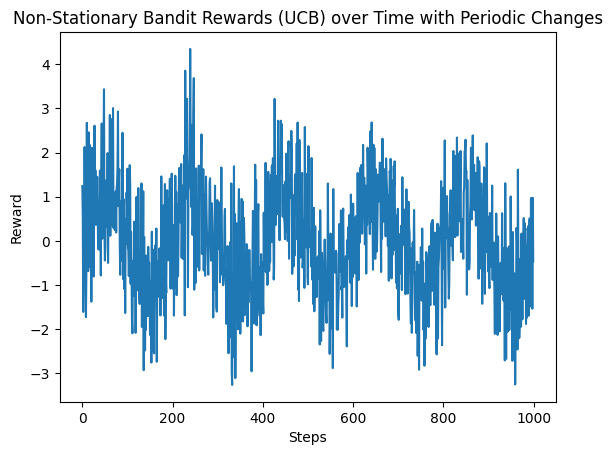

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NonStationaryBanditUCB:
    def __init__(self, n_arms, n_steps, window_size=100, period=200):
        self.n_arms = n_arms
        self.n_steps = n_steps
        self.window_size = window_size
        self.period = period
        self.true_values = np.zeros(n_arms)
        self.counts = np.zeros(n_arms)
        self.rewards = np.zeros(n_arms)
        self.arm_history = []
        self.reward_history = []

    def reset(self):
        self.true_values = np.random.normal(0, 1, self.n_arms)
        self.counts = np.zeros(self.n_arms)
        self.rewards = np.zeros(self.n_arms)
        self.arm_history = []
        self.reward_history = []

    def step(self, arm, step):
        # Simulate periodic reward distribution change
        self.true_values = np.sin(2 * np.pi * step / self.period) + np.random.normal(0, 0.1, self.n_arms)
        reward = np.random.normal(self.true_values[arm], 1)
        return reward

    def select_arm(self, step):
        # UCB selection strategy
        total_counts = np.sum(self.counts)
        if total_counts == 0:
            return np.random.randint(self.n_arms)
        ucb_values = self.rewards / (self.counts + 1e-5) + np.sqrt(2 * np.log(total_counts + 1) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.rewards[arm] += reward
        self.arm_history.append(arm)
        self.reward_history.append(reward)

    def run(self):
        for step in range(self.n_steps):
            arm = self.select_arm(step)
            reward = self.step(arm, step)
            self.update(arm, reward)

def simulate_ucb_bandit(n_arms, n_steps, window_size=100, period=200):
    bandit = NonStationaryBanditUCB(n_arms, n_steps, window_size, period)
    bandit.reset()
    bandit.run()

    plt.plot(bandit.reward_history)
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title('Non-Stationary Bandit Rewards (UCB) over Time with Periodic Changes')
    plt.show()

# Simulate UCB for the non-stationary bandit problem
simulate_ucb_bandit(n_arms=5, n_steps=1000, window_size=100, period=200)


#EXPLANATION

Here’s a step-by-step explanation of the code for a **Non-Stationary Bandit** problem solved using the **Upper Confidence Bound (UCB)** strategy. The environment introduces periodic changes to the reward distribution of each arm, simulating a dynamic (non-stationary) setting.

### 1. **Class Initialization:**
```python
class NonStationaryBanditUCB:
    def __init__(self, n_arms, n_steps, window_size=100, period=200):
        self.n_arms = n_arms
        self.n_steps = n_steps
        self.window_size = window_size
        self.period = period
        self.true_values = np.zeros(n_arms)
        self.counts = np.zeros(n_arms)
        self.rewards = np.zeros(n_arms)
        self.arm_history = []
        self.reward_history = []
```
- **n_arms**: Number of arms (or options) in the bandit problem.
- **n_steps**: Total number of steps (iterations).
- **window_size**: Size of the sliding window for tracking rewards (though not used explicitly here).
- **period**: Controls the periodic oscillations of the reward distribution.
- **true_values**: The underlying "true" values for each arm, initialized to zeros.
- **counts**: Tracks how many times each arm has been selected.
- **rewards**: Stores the cumulative rewards for each arm.
- **arm_history**: Tracks which arm was selected at each step.
- **reward_history**: Tracks the rewards received at each step.

---

### 2. **Reset Method:**
```python
def reset(self):
    self.true_values = np.random.normal(0, 1, self.n_arms)
    self.counts = np.zeros(self.n_arms)
    self.rewards = np.zeros(self.n_arms)
    self.arm_history = []
    self.reward_history = []
```
- **reset()**: Resets the bandit environment by reinitializing the true values, counts, rewards, and histories. The true values for each arm are initialized from a normal distribution with mean 0 and variance 1.

---

### 3. **Reward Step (With Periodic Changes):**
```python
def step(self, arm, step):
    self.true_values = np.sin(2 * np.pi * step / self.period) + np.random.normal(0, 0.1, self.n_arms)
    reward = np.random.normal(self.true_values[arm], 1)
    return reward
```
- The **reward distribution** changes **periodically** according to a sinusoidal function:
  - `np.sin(2 * np.pi * step / self.period)`: This creates a cyclic pattern in the reward values, simulating non-stationarity.
  - A small random noise (`np.random.normal(0, 0.1)`) is added to the true values to introduce variability in the rewards.
- **reward**: The actual reward is drawn from a normal distribution centered around the current true value of the selected arm, with a standard deviation of 1.

---

### 4. **UCB (Upper Confidence Bound) Selection Strategy:**
```python
def select_arm(self, step):
    total_counts = np.sum(self.counts)
    if total_counts == 0:
        return np.random.randint(self.n_arms)
    ucb_values = self.rewards / (self.counts + 1e-5) + np.sqrt(2 * np.log(total_counts + 1) / (self.counts + 1e-5))
    return np.argmax(ucb_values)
```
- **total_counts**: The total number of times any arm has been selected.
- **If no arms have been selected yet**: Choose an arm randomly.
- **UCB Calculation**:
  - `self.rewards / (self.counts + 1e-5)`: Average reward for each arm (with a small number added to avoid division by zero).
  - `np.sqrt(2 * np.log(total_counts + 1) / (self.counts + 1e-5))`: The **confidence interval** grows larger for arms that have been pulled fewer times, encouraging exploration of underexplored arms.
  - **np.argmax(ucb_values)**: The arm with the highest UCB value is selected (exploitation of high-reward arms with some exploration).

---

### 5. **Update the Bandit's Knowledge:**
```python
def update(self, arm, reward):
    self.counts[arm] += 1
    self.rewards[arm] += reward
    self.arm_history.append(arm)
    self.reward_history.append(reward)
```
- **update()**:
  - Increments the count for the selected arm.
  - Adds the received reward to the cumulative reward for the selected arm.
  - Records the selected arm and reward in the history.

---

### 6. **Run the UCB Algorithm:**
```python
def run(self):
    for step in range(self.n_steps):
        arm = self.select_arm(step)
        reward = self.step(arm, step)
        self.update(arm, reward)
```
- **run()**:
  - Iterates through the steps.
  - In each step, it selects an arm using the UCB strategy, receives a reward, and updates its knowledge based on that reward.

---

### 7. **Simulation Function:**
```python
def simulate_ucb_bandit(n_arms, n_steps, window_size=100, period=200):
    bandit = NonStationaryBanditUCB(n_arms, n_steps, window_size, period)
    bandit.reset()
    bandit.run()

    plt.plot(bandit.reward_history)
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title('Non-Stationary Bandit Rewards (UCB) over Time with Periodic Changes')
    plt.show()
```
- This function initializes the bandit with a certain number of arms, steps, and a periodic reward distribution.
- After running the bandit for `n_steps`, it plots the reward history to visualize how rewards evolve over time as the UCB strategy selects different arms.

---

### 8. **Execution:**
```python
simulate_ucb_bandit(n_arms=5, n_steps=1000, window_size=100, period=200)
```
- **n_arms**: The number of bandit arms is set to 5.
- **n_steps**: The algorithm runs for 1000 steps.
- **window_size**: A sliding window of 100 steps is used (though not explicitly in the code).
- **period**: The rewards change periodically with a period of 200 steps.

### Key Conceptual Points:
- **Non-Stationary Bandit Problem**: The reward distributions of the arms change periodically, meaning that an arm that was previously optimal may not remain optimal.
- **UCB (Upper Confidence Bound)**: This strategy balances exploration and exploitation by selecting arms based on both their average rewards and how uncertain the model is about those rewards.
- **Periodicity**: The reward distribution changes based on a sinusoidal function, adding complexity and making the environment dynamic, which tests the robustness of the UCB algorithm.

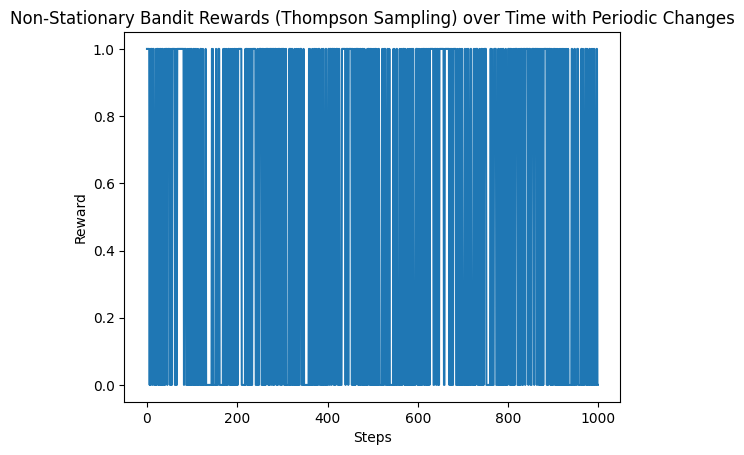

In [ ]:
class NonStationaryBanditThompson:
    def __init__(self, n_arms, n_steps, window_size=100, period=200):
        self.n_arms = n_arms
        self.n_steps = n_steps
        self.window_size = window_size
        self.period = period
        self.true_values = np.zeros(n_arms)
        self.alpha = np.ones(n_arms)  # Success counts for Beta distribution
        self.beta = np.ones(n_arms)   # Failure counts for Beta distribution
        self.arm_history = []
        self.reward_history = []

    def reset(self):
        self.true_values = np.random.normal(0, 1, self.n_arms)
        self.alpha = np.ones(self.n_arms)
        self.beta = np.ones(self.n_arms)
        self.arm_history = []
        self.reward_history = []

    def step(self, arm, step):
        # Simulate periodic reward distribution change
        self.true_values = np.sin(2 * np.pi * step / self.period) + np.random.normal(0, 0.1, self.n_arms)
        reward = np.random.binomial(1, 1 / (1 + np.exp(-self.true_values[arm])))  # Sigmoid function for reward
        return reward

    def select_arm(self):
        # Thompson Sampling: Sample from Beta distributions to select the arm
        sampled_values = np.random.beta(self.alpha, self.beta)
        return np.argmax(sampled_values)

    def update(self, arm, reward):
        if reward > 0:
            self.alpha[arm] += 1
        else:
            self.beta[arm] += 1
        self.arm_history.append(arm)
        self.reward_history.append(reward)

    def run(self):
        for step in range(self.n_steps):
            arm = self.select_arm()
            reward = self.step(arm, step)
            self.update(arm, reward)

def simulate_thompson_bandit(n_arms, n_steps, window_size=100, period=200):
    bandit = NonStationaryBanditThompson(n_arms, n_steps, window_size, period)
    bandit.reset()
    bandit.run()

    plt.plot(bandit.reward_history)
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title('Non-Stationary Bandit Rewards (Thompson Sampling) over Time with Periodic Changes')
    plt.show()

# Simulate Thompson Sampling for the non-stationary bandit problem
simulate_thompson_bandit(n_arms=5, n_steps=1000, window_size=100, period=200)


# EXPLANATION

This code implements a **non-stationary multi-armed bandit** problem using **Thompson Sampling** as the exploration-exploitation strategy. Let’s break it down step by step:

### 1. **Class Initialization (`__init__`)**:
```python
class NonStationaryBanditThompson:
    def __init__(self, n_arms, n_steps, window_size=100, period=200):
        self.n_arms = n_arms
        self.n_steps = n_steps
        self.window_size = window_size
        self.period = period
        self.true_values = np.zeros(n_arms)
        self.alpha = np.ones(n_arms)  # Success counts for Beta distribution
        self.beta = np.ones(n_arms)   # Failure counts for Beta distribution
        self.arm_history = []
        self.reward_history = []
```
- **n_arms**: Number of bandit arms (choices) available.
- **n_steps**: Total number of steps to run the simulation.
- **window_size**: Window size for tracking (not directly used here, but can be for evaluation over time).
- **period**: This controls how frequently the reward probabilities change.
- **true_values**: Stores the true reward probabilities (periodically changes).
- **alpha, beta**: Parameters for the Beta distribution used in Thompson Sampling. They store success and failure counts for each arm.
- **arm_history**: Tracks which arm was selected at each step.
- **reward_history**: Tracks the reward received at each step.

### 2. **Reset Method** (`reset`)**:
```python
def reset(self):
    self.true_values = np.random.normal(0, 1, self.n_arms)
    self.alpha = np.ones(self.n_arms)
    self.beta = np.ones(self.n_arms)
    self.arm_history = []
    self.reward_history = []
```
- **reset()** re-initializes the environment:
  - Sets the initial `true_values` for each arm by drawing from a normal distribution.
  - Resets `alpha` and `beta` (success and failure counts) to 1 for each arm, indicating a neutral prior belief.
  - Clears the history of arms and rewards.

### 3. **Step Function** (`step`)**:
```python
def step(self, arm, step):
    self.true_values = np.sin(2 * np.pi * step / self.period) + np.random.normal(0, 0.1, self.n_arms)
    reward = np.random.binomial(1, 1 / (1 + np.exp(-self.true_values[arm])))  # Sigmoid function for reward
    return reward
```
- **Non-stationary environment**: At each step, the reward probabilities (`true_values`) for each arm are updated periodically using a sinusoidal function, adding noise for randomness.
- **Reward**: The reward is calculated based on a sigmoid transformation of the `true_value` for the chosen arm (ensuring the reward is between 0 and 1). It uses a binomial distribution to simulate a binary reward (success or failure).

### 4. **Arm Selection (Thompson Sampling)** (`select_arm`)**:
```python
def select_arm(self):
    sampled_values = np.random.beta(self.alpha, self.beta)
    return np.argmax(sampled_values)
```
- **Thompson Sampling**: For each arm, a sample is drawn from the Beta distribution, parameterized by `alpha` (successes) and `beta` (failures). The arm with the highest sampled value is selected, balancing exploration and exploitation based on current beliefs.

### 5. **Update Method** (`update`)**:
```python
def update(self, arm, reward):
    if reward > 0:
        self.alpha[arm] += 1
    else:
        self.beta[arm] += 1
    self.arm_history.append(arm)
    self.reward_history.append(reward)
```
- After selecting an arm and receiving a reward:
  - **alpha[arm]**: Increases by 1 if the reward is positive (indicating success).
  - **beta[arm]**: Increases by 1 if the reward is zero (indicating failure).
  - The selected arm and the reward are recorded for later analysis.

### 6. **Run Method (`run`)**:
```python
def run(self):
    for step in range(self.n_steps):
        arm = self.select_arm()
        reward = self.step(arm, step)
        self.update(arm, reward)
```
- **run()** is the core loop of the bandit simulation:
  - It runs for `n_steps` iterations.
  - At each step, the algorithm:
    1. Selects an arm using **Thompson Sampling**.
    2. Receives a reward based on the current environment (with periodic changes).
    3. Updates its knowledge of the arm’s success/failure history.

### 7. **Simulation Function** (`simulate_thompson_bandit`)**:
```python
def simulate_thompson_bandit(n_arms, n_steps, window_size=100, period=200):
    bandit = NonStationaryBanditThompson(n_arms, n_steps, window_size, period)
    bandit.reset()
    bandit.run()

    plt.plot(bandit.reward_history)
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title('Non-Stationary Bandit Rewards (Thompson Sampling) over Time with Periodic Changes')
    plt.show()
```
- This function initializes a `NonStationaryBanditThompson` instance and simulates the bandit problem.
- After the simulation is complete, it plots the **reward history** to visualize how rewards evolve over time under periodic changes.

### 8. **Execution**:
```python
simulate_thompson_bandit(n_arms=5, n_steps=1000, window_size=100, period=200)
```
- **simulate_thompson_bandit()** runs the Thompson Sampling simulation with:
  - `n_arms=5`: 5 different arms to choose from.
  - `n_steps=1000`: Runs the simulation for 1000 steps.
  - `period=200`: The reward probabilities change periodically every 200 steps.
  
- After running, it plots the reward history, showing how the agent's performance evolves as the environment (reward distributions) changes.

---

### **Summary of the Key Concepts**:
- **Non-Stationary Bandit**: The reward probabilities for each arm change over time in a periodic manner, which makes the problem more challenging than a stationary bandit.
- **Thompson Sampling**: A probabilistic method that balances exploration and exploitation by sampling from the Beta distribution (parameterized by past successes and failures).
- **Periodic Reward Changes**: This simulates a more realistic, dynamic environment where the reward probabilities evolve over time.
- **Visualization**: The reward history plot helps visualize how well the agent adapts to the changes in the environment.

